In [20]:
import pandas as pd
from prophet import Prophet

In [43]:
df = pd.read_excel("全部.xlsx")

In [44]:
df.head()

,开播时间,直播时长,观看人次,直播曝光量,付费(预估),推荐feed,短视频引流,关注,其他,直播穿透率,人气峰值,平均在线人数,平均停留时间,uv价值,点赞数,销量,销售额,客单价,转化率
0,2024-01-01,59281,217684,2312000,0.155,0.418,0.162,0.158,0.107,5%~10%,1155,225,61,2.871134,7096,1750.0,625000,350,0.008039
1,2024-01-02,57708,134663,1072000,0.155,0.439,0.115,0.181,0.110,10%~15%,205,122,52,4.641215,7683,1750.0,625000,350,0.012995
2,2024-01-03,57742,100062,854000,0.173,0.367,0.117,0.210,0.133,10%~15%,477,97,56,3.747676,6766,875.0,375000,350,0.008745
3,2024-01-04,57664,98163,786000,0.154,0.369,0.118,0.204,0.155,10%~15%,187,87,51,3.820177,6089,875.0,375000,350,0.008914
4,2024-01-05,57729,109174,810000,0.185,0.384,0.124,0.200,0.107,10%~15%,600,107,57,3.434884,6538,1750.0,375000,350,0.016029


In [45]:
holidays = pd.DataFrame({
    'holiday': 'national_day',
    'ds': pd.to_datetime(['2024-10-01', '2024-10-02', '2024-10-03']),
    'lower_window': 0,
    'upper_window': 1
})

In [46]:
df = df[['开播时间', '观看人次']].copy().dropna()
df = df.iloc[1:].reset_index(drop=True)
df.columns = ['ds', 'y']

In [47]:
df

,ds,y
0,2024-01-02,134663
1,2024-01-03,100062
2,2024-01-04,98163
3,2024-01-05,109174
4,2024-01-06,100547
...,...,...
510,2025-05-27,138503
511,2025-05-28,139762
512,2025-05-29,136931
513,2025-05-30,117516


In [48]:
df['ds'] = pd.to_datetime(df['ds'], format="%m/%d/%y")

In [49]:
df

,ds,y
0,2024-01-02,134663
1,2024-01-03,100062
2,2024-01-04,98163
3,2024-01-05,109174
4,2024-01-06,100547
...,...,...
510,2025-05-27,138503
511,2025-05-28,139762
512,2025-05-29,136931
513,2025-05-30,117516


In [17]:
holiday_defs = [
    ('new_year',       '2024-01-01', -3, 3),
    ('chunjie',        '2024-02-08', -10, 0),
    ('38_day',     '2024-03-08', -7, 2),
     ('mothers_day',     '2024-05-11', -7, 3),
    ('618_sale',   '2024-06-18', -7, 3),
    ('school_opening', '2024-08-25', -3, 3),
    ('guoqing',        '2024-10-08', -3, 3),
    ('double11',       '2024-11-11', -14, 5),
    ('double12',       '2024-12-12', -3, 2),
    ('38_day',       '2025-03-08', -14, 0),
    ('caizhuangjie',       '2025-04-16', -2, 2),
    ('618_sale',       '2025-05-18', -3, 14),
    
]

holidays = pd.DataFrame([
    {'holiday': name, 'ds': pd.to_datetime(date), 'lower_window': lw, 'upper_window': uw}
    for name, date, lw, uw in holiday_defs
])

In [18]:
m = Prophet(holidays=holidays, yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=0)
forecast = m.predict(future)

10:41:39 - cmdstanpy - INFO - Chain [1] start processing
10:41:39 - cmdstanpy - INFO - Chain [1] done processing


10:41:42 - cmdstanpy - INFO - Chain [1] start processing
10:41:42 - cmdstanpy - INFO - Chain [1] done processing


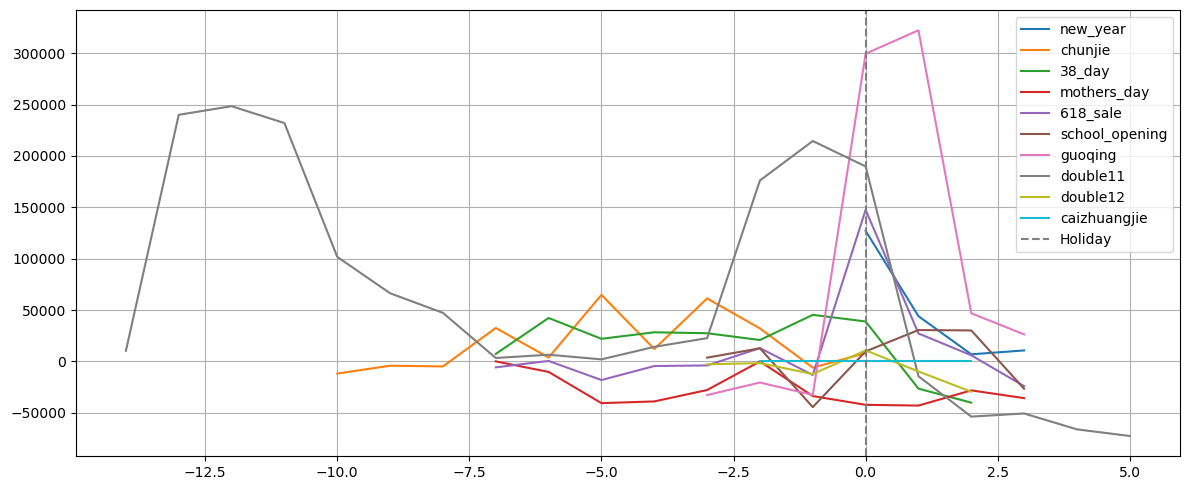

In [19]:
holiday_names = holidays['holiday'].unique().tolist()

from prophet import Prophet

model = Prophet(holidays=holidays)
model.fit(df) 

future = model.make_future_dataframe(periods=240)  # 未来预测240天
forecast = model.predict(future)  # 生成预测结果

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

for hname in holiday_names:
    if hname in forecast.columns:
        
        row = holidays[holidays['holiday'] == hname].iloc[0]
        h_date = row['ds']
        lower = row['lower_window']
        upper = row['upper_window']

        
        start = h_date + pd.Timedelta(days=lower)
        end   = h_date + pd.Timedelta(days=upper)
        window = forecast[(forecast['ds'] >= start) & (forecast['ds'] <= end)].copy()

        
        window['relative_day'] = (window['ds'] - h_date).dt.days

        
        plt.plot(window['relative_day'], window[hname], label=hname)


plt.axvline(0, color='gray', linestyle='--', label='Holiday')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()